In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

from plotting import plot_utils, summary_plots, load_fits, plot_prf_params, pycortex_plot_utils
plot_utils.set_all_font_sizes(12)
from utils import roi_utils, default_paths, stats_utils

In [2]:
# Load results of the fitting procedure
subjects = np.arange(1,9)
n_subjects = len(subjects)

feature_type_list_long = ['gabor_solo_ridge_12ori_8sf',\
                 'texture_pyramid_ridge_4ori_4sf_pca_HL','sketch_tokens',\
                 'alexnet_best_layer_pca', 'clip_RN50_best_layer_pca']
feature_type_list = ['gabor',\
                 'texture_pyramid','sketch_tokens',\
                 'alexnet', 'clip']
n_models = len(feature_type_list)
out_list = []
for fi, fitting_type in enumerate(feature_type_list_long):

    out = [load_fits.load_fit_results(subject=ss, fitting_type=fitting_type, \
                                      n_from_end=0, verbose=False) \
           for ss in subjects]
    out_list.append(out)
    
out = out_list
    
fig_save_folder=None

In [3]:
# initialize roi_def objects to get roi indices
skip_inds = [4,5,7,11,12, 19,20, 22, 24]
roi_def = roi_utils.multi_subject_roi_def(subjects, skip_areas=skip_inds)
roi_names =roi_def.roi_names
n_rois = roi_def.n_rois

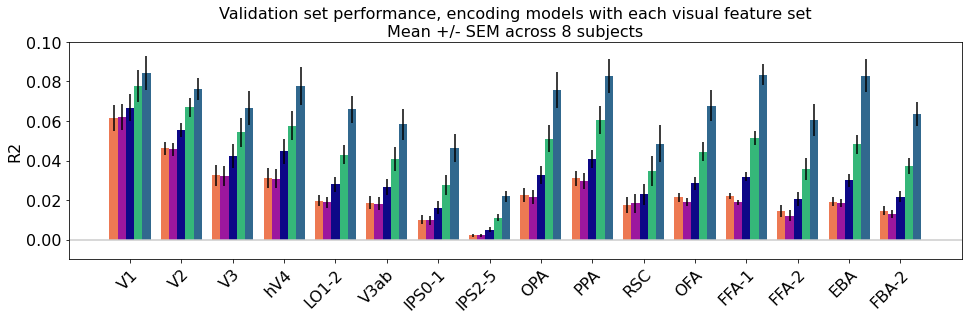

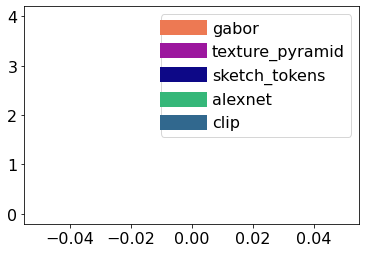

In [12]:
# Plot performance of each feature type when fit alone.

colors1 = np.flipud(cm.plasma(np.linspace(0,1,4))[0:3,:])
colors2 = np.flipud(cm.viridis(np.linspace(0,1,4))[1:3,:])
colors = np.concatenate([colors1, colors2], axis=0)

vals = np.zeros((n_subjects, n_rois, n_models))

for fi in range(n_models):

    for si, ss in enumerate(subjects):

        val_r2 = out[fi][si]['val_r2'][:,0]    

        for ri in range(n_rois):

            inds_this_roi = roi_def.ss_roi_defs[si].get_indices(ri)
        
            vals[si,ri,fi] = np.mean(val_r2[inds_this_roi])

mean_vals = np.mean(vals, axis=0)
sem_vals = np.std(vals, axis=0) / np.sqrt(n_subjects)

legend_separate=True
title='Validation set performance, encoding models with each visual feature set\nMean +/- SEM across 8 subjects'

plot_utils.set_all_font_sizes(fs = 16)
fh = plot_utils.plot_multi_bars(mean_data=mean_vals, err_data=sem_vals, colors=colors, space=0.1, \
                xticklabels=roi_names, ylabel='R2', \
                ylim=[-0.01, 0.10], title=title, horizontal_line_pos=0,\
                legend_labels=feature_type_list, \
                legend_overlaid=False, legend_separate=legend_separate, \
                fig_size=(16,4))


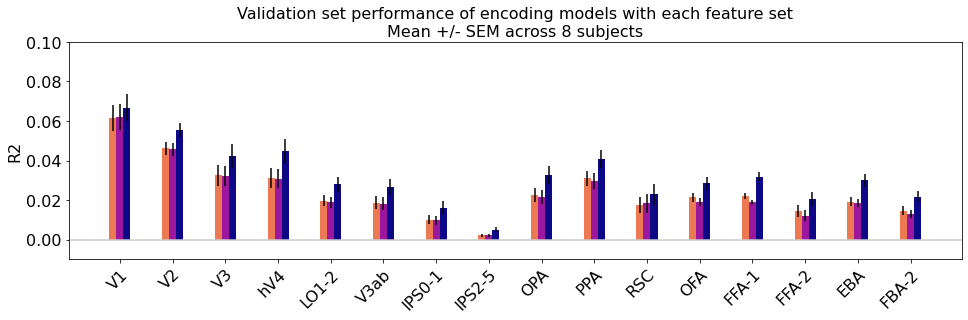

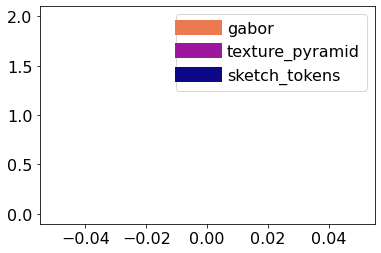

In [7]:
# Plot performance of each feature type when fit alone.

mm2plot = [0,1,2]

colors1 = np.flipud(cm.plasma(np.linspace(0,1,4))[0:3,:])
colors2 = np.flipud(cm.viridis(np.linspace(0,1,4))[1:3,:])
colors = np.concatenate([colors1, colors2], axis=0)
colors = colors[mm2plot,:]

vals = np.zeros((n_subjects, n_rois, len(mm2plot)))

for fi, mm in enumerate(mm2plot):

    for si, ss in enumerate(subjects):

        val_r2 = out[mm][si]['val_r2'][:,0]    

        for ri in range(n_rois):

            inds_this_roi = roi_def.ss_roi_defs[si].get_indices(ri)
        
            vals[si,ri,fi] = np.mean(val_r2[inds_this_roi])

mean_vals = np.mean(vals, axis=0)
sem_vals = np.std(vals, axis=0) / np.sqrt(n_subjects)

legend_separate=True
title='Validation set performance of encoding models with each feature set\nMean +/- SEM across 8 subjects'

plot_utils.set_all_font_sizes(fs = 16)
fh = plot_utils.plot_multi_bars(mean_data=mean_vals, err_data=sem_vals, colors=colors, space=0.3, \
                xticklabels=roi_names, ylabel='R2', \
                ylim=[-0.01, 0.10], title=title, horizontal_line_pos=0,\
                legend_labels=np.array(feature_type_list)[mm2plot], \
                legend_overlaid=False, legend_separate=legend_separate, \
                fig_size=(16,4))


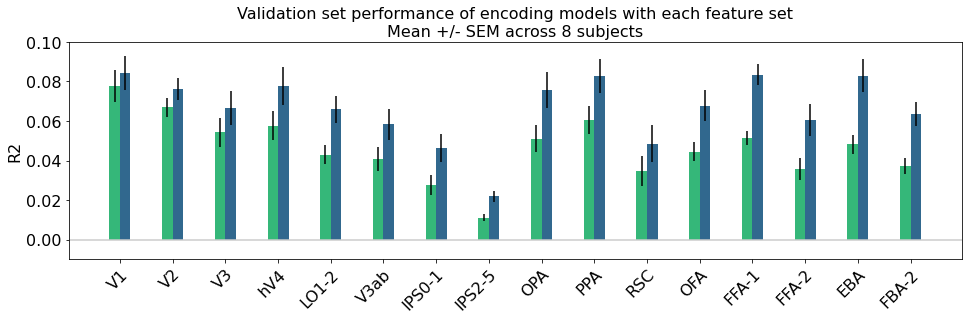

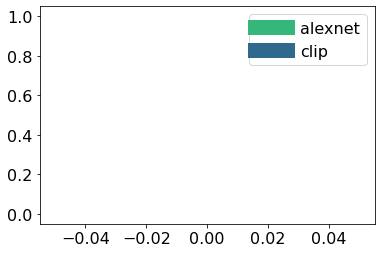

In [8]:
# Plot performance of each feature type when fit alone.

mm2plot = [3,4]

colors1 = np.flipud(cm.plasma(np.linspace(0,1,4))[0:3,:])
colors2 = np.flipud(cm.viridis(np.linspace(0,1,4))[1:3,:])
colors = np.concatenate([colors1, colors2], axis=0)
colors = colors[mm2plot,:]

vals = np.zeros((n_subjects, n_rois, len(mm2plot)))

for fi, mm in enumerate(mm2plot):

    for si, ss in enumerate(subjects):

        val_r2 = out[mm][si]['val_r2'][:,0]    

        for ri in range(n_rois):

            inds_this_roi = roi_def.ss_roi_defs[si].get_indices(ri)
        
            vals[si,ri,fi] = np.mean(val_r2[inds_this_roi])

mean_vals = np.mean(vals, axis=0)
sem_vals = np.std(vals, axis=0) / np.sqrt(n_subjects)

legend_separate=True
title='Validation set performance of encoding models with each feature set\nMean +/- SEM across 8 subjects'

plot_utils.set_all_font_sizes(fs = 16)
fh = plot_utils.plot_multi_bars(mean_data=mean_vals, err_data=sem_vals, colors=colors, space=0.3, \
                xticklabels=roi_names, ylabel='R2', \
                ylim=[-0.01, 0.10], title=title, horizontal_line_pos=0,\
                legend_labels=np.array(feature_type_list)[mm2plot], \
                legend_overlaid=False, legend_separate=legend_separate, \
                fig_size=(16,4))


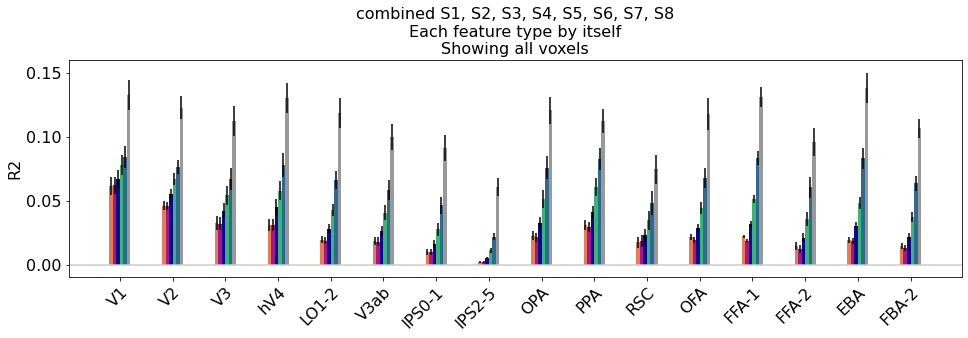

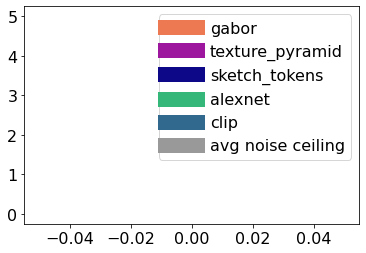

In [14]:
# Plot performance of each feature type when fit alone.

colors1 = np.flipud(cm.plasma(np.linspace(0,1,4))[0:3,:])
colors2 = np.flipud(cm.viridis(np.linspace(0,1,4))[1:3,:])
colors = np.concatenate([colors1, colors2], axis=0)

vals = np.zeros((n_subjects, n_rois, n_models))

for fi in range(n_models):

    for si, ss in enumerate(subjects):

        val_r2 = out[fi][si]['val_r2'][:,0]    

        for ri in range(n_rois):

            inds_this_roi = roi_def.ss_roi_defs[si].get_indices(ri)
        
            vals[si,ri,fi] = np.mean(val_r2[inds_this_roi])


nc_vals = np.zeros((n_subjects, n_rois, 1))

fi=0

for si, ss in enumerate(subjects):
    
    voxel_ncsnr = out[fi][si]['voxel_ncsnr'].ravel()[out[fi][si]['voxel_index'][0]]
    noise_ceiling = nsd_utils.ncsnr_to_nc(voxel_ncsnr)/100

    for ri in range(n_rois):

        inds_this_roi = roi_def.ss_roi_defs[si].get_indices(ri)

        nc_vals[si,ri,fi] = np.mean(noise_ceiling[inds_this_roi])

vals = np.concatenate([vals, nc_vals], axis=2)

colors = np.concatenate([colors, np.array([[0.6, 0.6, 0.6, 1]])], axis=0)

names = feature_type_list + ['avg noise ceiling']

mean_vals = np.mean(vals, axis=0)
sem_vals = np.std(vals, axis=0) / np.sqrt(n_subjects)

legend_separate=True
title='%s\nEach feature type by itself\nShowing all voxels'%(summary_plots.get_substr(out[0]))

plot_utils.set_all_font_sizes(fs = 16)
fh = plot_utils.plot_multi_bars(mean_data=mean_vals, err_data=sem_vals, colors=colors, space=0.3, \
                xticklabels=roi_names, ylabel='R2', \
                ylim=[-0.01, 0.16], title=title, horizontal_line_pos=0,\
                legend_labels=names, \
                legend_overlaid=False, legend_separate=legend_separate, \
                fig_size=(16,4))


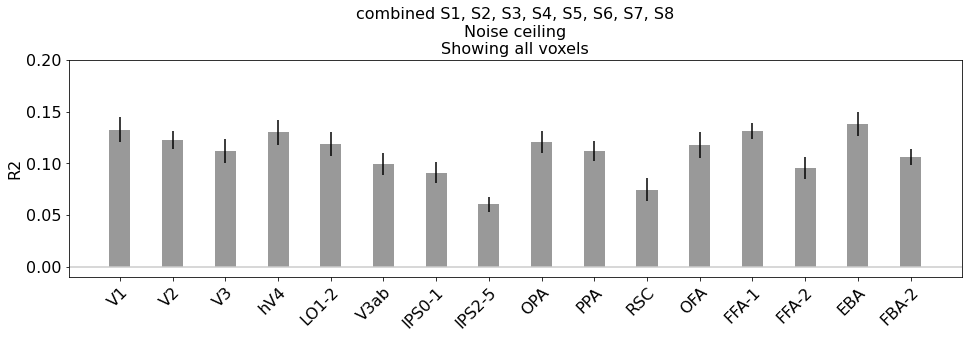

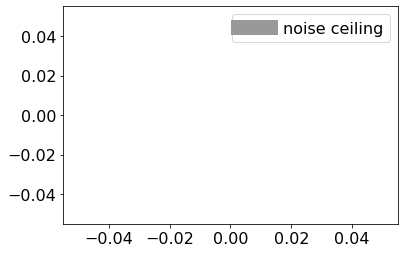

In [17]:
# Plot avg noise ceiling each ROI, for comparison.
from utils import nsd_utils

colors = np.array([[0.6, 0.6, 0.6]])

vals = np.zeros((n_subjects, n_rois, 1))

fi=0

for si, ss in enumerate(subjects):
    
    voxel_ncsnr = out[fi][si]['voxel_ncsnr'].ravel()[out[fi][si]['voxel_index'][0]]
    noise_ceiling = nsd_utils.ncsnr_to_nc(voxel_ncsnr)/100

    for ri in range(n_rois):

        inds_this_roi = roi_def.ss_roi_defs[si].get_indices(ri)

        vals[si,ri,fi] = np.mean(noise_ceiling[inds_this_roi])

mean_vals = np.mean(vals, axis=0)
sem_vals = np.std(vals, axis=0) / np.sqrt(n_subjects)

legend_separate=True
title='%s\nNoise ceiling\nShowing all voxels'%(summary_plots.get_substr(out[0]))

plot_utils.set_all_font_sizes(fs = 16)
fh = plot_utils.plot_multi_bars(mean_data=mean_vals, err_data=sem_vals, colors=colors, space=0.3, \
                xticklabels=roi_names, ylabel='R2', \
                ylim=[-0.01, 0.20], title=title, horizontal_line_pos=0,\
                legend_labels=['noise ceiling'], \
                legend_overlaid=False, legend_separate=legend_separate, \
                fig_size=(16,4))


In [35]:
mean_vals.shape

(16, 1)

In [36]:
np.linspace(-0.5+0.3, 0.5-0.3, 1)

array([-0.2])